In [1]:
# Requisitos 

import re
import pandas as pd
import pickle 

In [2]:
# Abrir dataframe (después de revisar en Excel)

normas = pd.read_csv('import_dataframe.csv', sep=";" )

In [3]:
normas

,Normativa,Link,Tipo de Norma,Número,Día,Año,Mes
0,DECRETO 128 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,128,26,2016,ENERO
1,DECRETO 127 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,127,26,2016,ENERO
2,DECRETO 126 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,126,26,2016,ENERO
3,DECRETO 125 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,125,26,2016,ENERO
4,DECRETO 124 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,124,26,2016,ENERO
5,DECRETO 123 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,123,26,2016,ENERO
6,DECRETO 122 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,122,26,2016,ENERO
7,DECRETO 121 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,121,26,2016,ENERO
8,DECRETO 120 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,120,26,2016,ENERO
9,DECRETO 118 DEL 25 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,118,25,2016,ENERO


In [4]:
normas.head()

,Normativa,Link,Tipo de Norma,Número,Día,Año,Mes
0,DECRETO 128 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,128,26,2016,ENERO
1,DECRETO 127 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,127,26,2016,ENERO
2,DECRETO 126 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,126,26,2016,ENERO
3,DECRETO 125 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,125,26,2016,ENERO
4,DECRETO 124 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,124,26,2016,ENERO


In [5]:
len(normas)

3706

In [6]:
dfList = list(normas['Mes'])

In [7]:
# convertir a formato número para llegar a función Datetime
months_={"ENERO":"01","FEBRERO":"02","MARZO":"03","ABRIL":"04","MAYO":"05","JUNIO":"06","JULIO":"07",
        "AGOSTO":"08","SEPTIEMBRE":"09","OCTUBRE":"10","NOVIEMBRE":"11","DICIEMBRE":"12"}
def tonumber (text):
    if text in months_.keys():
        num_mes= months_[text]
    else:
        num_mes = "NA"
    return (num_mes)

In [8]:
new_month = [tonumber(i) for i in dfList]

In [9]:
normas['Month'] = new_month
normas

,Normativa,Link,Tipo de Norma,Número,Día,Año,Mes,Month
0,DECRETO 128 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,128,26,2016,ENERO,01
1,DECRETO 127 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,127,26,2016,ENERO,01
2,DECRETO 126 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,126,26,2016,ENERO,01
3,DECRETO 125 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,125,26,2016,ENERO,01
4,DECRETO 124 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,124,26,2016,ENERO,01
5,DECRETO 123 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,123,26,2016,ENERO,01
6,DECRETO 122 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,122,26,2016,ENERO,01
7,DECRETO 121 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,121,26,2016,ENERO,01
8,DECRETO 120 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,120,26,2016,ENERO,01
9,DECRETO 118 DEL 25 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,118,25,2016,ENERO,01


In [10]:
# Convertir de string a integer para aplicar Datetime

x = list(normas['Month'])
xx = []
for i in range(3706):
    a=int(x[i])
    xx.append(a)

y = list(normas['Día'])
xy = []
for i in range(3706):
    a=int(y[i])
    xy.append(a)
    
z = list(normas['Año'])
xz = []
for i in range(3706):
    a=int(z[i])
    xz.append(a)
    
print(len(xx),len(xy),len(xz))

3706 3706 3706


In [11]:
normas['Month'] = xx
normas['Day'] = xy
normas['Year'] = xz

normas

,Normativa,Link,Tipo de Norma,Número,Día,Año,Mes,Month,Day,Year
0,DECRETO 128 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,128,26,2016,ENERO,1,26,2016
1,DECRETO 127 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,127,26,2016,ENERO,1,26,2016
2,DECRETO 126 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,126,26,2016,ENERO,1,26,2016
3,DECRETO 125 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,125,26,2016,ENERO,1,26,2016
4,DECRETO 124 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,124,26,2016,ENERO,1,26,2016
5,DECRETO 123 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,123,26,2016,ENERO,1,26,2016
6,DECRETO 122 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,122,26,2016,ENERO,1,26,2016
7,DECRETO 121 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,121,26,2016,ENERO,1,26,2016
8,DECRETO 120 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,120,26,2016,ENERO,1,26,2016
9,DECRETO 118 DEL 25 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,118,25,2016,ENERO,1,25,2016


In [12]:
# Formato date a partir de Día,Mes,Año

normas['Date'] = pd.to_datetime(normas.Year * 10000 + normas.Month * 100 + normas.Day, format='%Y%m%d')

In [13]:
normas

,Normativa,Link,Tipo de Norma,Número,Día,Año,Mes,Month,Day,Year,Date
0,DECRETO 128 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,128,26,2016,ENERO,1,26,2016,2016-01-26
1,DECRETO 127 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,127,26,2016,ENERO,1,26,2016,2016-01-26
2,DECRETO 126 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,126,26,2016,ENERO,1,26,2016,2016-01-26
3,DECRETO 125 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,125,26,2016,ENERO,1,26,2016,2016-01-26
4,DECRETO 124 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,124,26,2016,ENERO,1,26,2016,2016-01-26
5,DECRETO 123 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,123,26,2016,ENERO,1,26,2016,2016-01-26
6,DECRETO 122 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,122,26,2016,ENERO,1,26,2016,2016-01-26
7,DECRETO 121 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,121,26,2016,ENERO,1,26,2016,2016-01-26
8,DECRETO 120 DEL 26 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,120,26,2016,ENERO,1,26,2016,2016-01-26
9,DECRETO 118 DEL 25 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,118,25,2016,ENERO,1,25,2016,2016-01-25


In [14]:
# Ordenar por Date

normas.sort_values('Date', inplace = True)

In [15]:
# Reiniciar índice 

normas.reset_index(inplace = True, drop = True)
normas

,Normativa,Link,Tipo de Norma,Número,Día,Año,Mes,Month,Day,Year,Date
0,DECRETO 03 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,3,5,2016,ENERO,1,5,2016,2016-01-05
1,DECRETO 04 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,4,5,2016,ENERO,1,5,2016,2016-01-05
2,DECRETO 07 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,7,5,2016,ENERO,1,5,2016,2016-01-05
3,DECRETO 08 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,8,5,2016,ENERO,1,5,2016,2016-01-05
4,DECRETO 09 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,9,5,2016,ENERO,1,5,2016,2016-01-05
5,DECRETO 06 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,6,5,2016,ENERO,1,5,2016,2016-01-05
6,DECRETO 13 DEL 06 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,13,6,2016,ENERO,1,6,2016,2016-01-06
7,DECRETO 17 DEL 08 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,17,8,2016,ENERO,1,8,2016,2016-01-08
8,DECRETO 38 DEL 12 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,38,12,2016,ENERO,1,12,2016,2016-01-12
9,DECRETO 35 DEL 12 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,35,12,2016,ENERO,1,12,2016,2016-01-12


In [16]:
# Dejar tabla con títulos en inglés y eliminar columnas de sobra

del normas["Día"]
del normas["Mes"]
del normas["Año"]
normas.columns = ['Title', 'Link','Type','Number','Month','Day','Year','Date']
normas

,Title,Link,Type,Number,Month,Day,Year,Date
0,DECRETO 03 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,3,1,5,2016,2016-01-05
1,DECRETO 04 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,4,1,5,2016,2016-01-05
2,DECRETO 07 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,7,1,5,2016,2016-01-05
3,DECRETO 08 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,8,1,5,2016,2016-01-05
4,DECRETO 09 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,9,1,5,2016,2016-01-05
5,DECRETO 06 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,6,1,5,2016,2016-01-05
6,DECRETO 13 DEL 06 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,13,1,6,2016,2016-01-06
7,DECRETO 17 DEL 08 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,17,1,8,2016,2016-01-08
8,DECRETO 38 DEL 12 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,38,1,12,2016,2016-01-12
9,DECRETO 35 DEL 12 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,35,1,12,2016,2016-01-12


In [17]:
# Guardar este archivo en formato csv

export_1_csv = normas.to_csv (r'C:\Users\MARIO MONSALVE\final_dataframe.csv', index = None, header=True)

----------------------

# Análisis de esta base de datos

In [18]:
# Total de Normativas

len(normas)

3706

In [19]:
# Número de días con al menos una normativa

len(normas.Date.unique())

541

In [20]:
# Días publicando normas

normas['Date'][3705] - normas['Date'][0]

Timedelta('1211 days 00:00:00')

In [21]:
# Mayor cantidad de normas en un mismo día

normas['Date'].value_counts()

2018-11-01    50
2016-11-10    50
2019-04-24    47
2017-06-09    42
2018-02-19    40
2016-12-22    39
2018-05-08    38
2017-05-16    38
2016-02-12    36
2017-11-30    36
2018-01-22    32
2016-02-24    30
2018-08-06    30
2016-12-07    30
2018-03-09    30
2016-09-15    29
2016-04-27    29
2019-03-19    28
2017-02-03    28
2018-05-24    27
2018-12-24    27
2016-10-11    26
2017-01-12    26
2017-10-04    26
2017-11-07    25
2018-12-28    25
2016-03-07    25
2016-10-21    24
2019-03-18    24
2018-01-18    24
              ..
2019-03-05     1
2016-11-21     1
2019-04-12     1
2017-10-02     1
2018-05-30     1
2016-06-30     1
2018-06-03     1
2019-02-06     1
2018-09-26     1
2016-03-10     1
2017-10-30     1
2017-02-17     1
2018-12-14     1
2019-04-04     1
2018-05-21     1
2017-08-28     1
2019-04-23     1
2017-02-06     1
2017-09-19     1
2016-08-04     1
2018-11-16     1
2016-11-08     1
2016-02-23     1
2019-02-25     1
2018-03-08     1
2017-12-05     1
2018-05-25     1
2018-10-31    

In [23]:
list(normas[normas['Date'] == '2018-11-01']['Title'])

['DECRETO 2028 DEL 01 DE NOVIEMBRE DE 2018',
 'DECRETO 2024 DEL 01 DE NOVIEMBRE DE 2018',
 'DECRETO 2026 DEL 01 DE NOVIEMBRE DE 2018',
 'DECRETO 2027 DEL 01 DE NOVIEMBRE DE 2018',
 'DECRETO 2029 DEL 01 DE NOVIEMBRE DE 2018',
 'DECRETO 2036 DEL 01 DE NOVIEMBRE DE 2018',
 'DECRETO 2031 DEL 01 DE NOVIEMBRE DE 2018',
 'DECRETO 2032 DEL 01 DE NOVIEMBRE DE 2018',
 'DECRETO 2033 DEL 01 DE NOVIEMBRE DE 2018',
 'DECRETO 2023 DEL 01 DE NOVIEMBRE DE 2018',
 'DECRETO 2034 DEL 01 DE NOVIEMBRE DE 2018',
 'DECRETO 2030 DEL 01 DE NOVIEMBRE DE 2018',
 'DECRETO 2021 DEL 01 DE NOVIEMBRE DE 2018',
 'DECRETO 2009 DEL 01 DE NOVIEMBRE DE 2018',
 'DECRETO 2016 DEL 01 DE NOVIEMBRE DE 2018',
 'DECRETO 2015 DEL 01 DE NOVIEMBRE DE 2018',
 'DECRETO 2014 DEL 01 DE NOVIEMBRE DE 2018',
 'DECRETO 2013 DEL 01 DE NOVIEMBRE DE 2018',
 'DECRETO 2012 DEL 01 DE NOVIEMBRE DE 2018',
 'DECRETO 2011 DEL 01 DE NOVIEMBRE DE 2018',
 'DECRETO 2010 DEL 01 DE NOVIEMBRE DE 2018',
 'DECRETO 2035 DEL 01 DE NOVIEMBRE DE 2018',
 'DECRETO 

In [26]:
# Requisitos (2 parte)

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [18.0, 8.0]

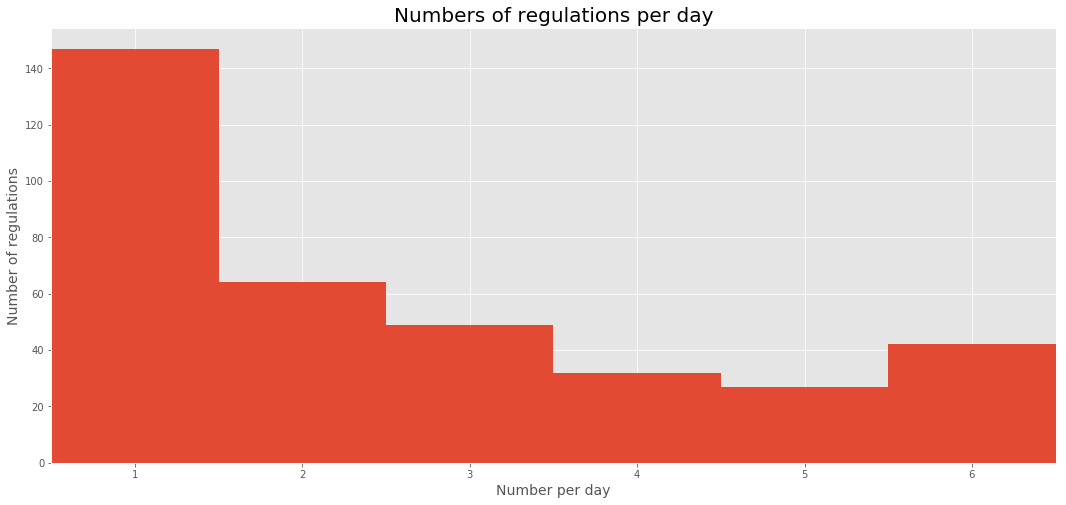

In [27]:
by_date = normas['Date'].value_counts()
plt.style.use('ggplot')
by_date.plot.hist(bins=range(1,9), align='left')
plt.xticks(range(1,8))
plt.xlim(0.5, 6.5)
plt.title("Numbers of regulations per day", fontdict={'fontsize': 20})
plt.ylabel("Number of regulations", fontdict={'fontsize': 14})
plt.xlabel("Number per day", fontdict={'fontsize': 14});

plt.savefig('regulation_perday.png')

In [28]:
# Convertir Datetime a días de semana para análsis
# Tomado de: https://github.com/smatallana/presidential_speeches/blob/master/speeches_analysis.ipynb

# Get day of the week with datetime method
normas['Day'] = normas['Date'].dt.dayofweek

# Create dictionary to label categorical variable produced by 'dayofweek' method
days = {0:'Monday',1:'Tuesday',2:'Wedsnesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

# For each value in 'Weekday', apply function that labels with corresponding name of the weekday
normas['Day'] = normas['Day'].apply(lambda x: days[x])

In [29]:
# Order levels of factor variable

normas['Day'] = \
    pd.Categorical(normas['Day'], ['Monday','Tuesday','Wedsnesday','Thursday','Friday','Saturday','Sunday'])

In [30]:
# Get count by weekday

by_weekday = normas['Day'].value_counts().sortlevel()
by_weekday

C:\Users\MARIO MONSALVE\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: sortlevel is deprecated, use sort_index(level=...)
  This is separate from the ipykernel package so we can avoid doing imports until


Monday        687
Tuesday       703
Wedsnesday    675
Thursday      812
Friday        787
Saturday       36
Sunday          6
Name: Day, dtype: int64

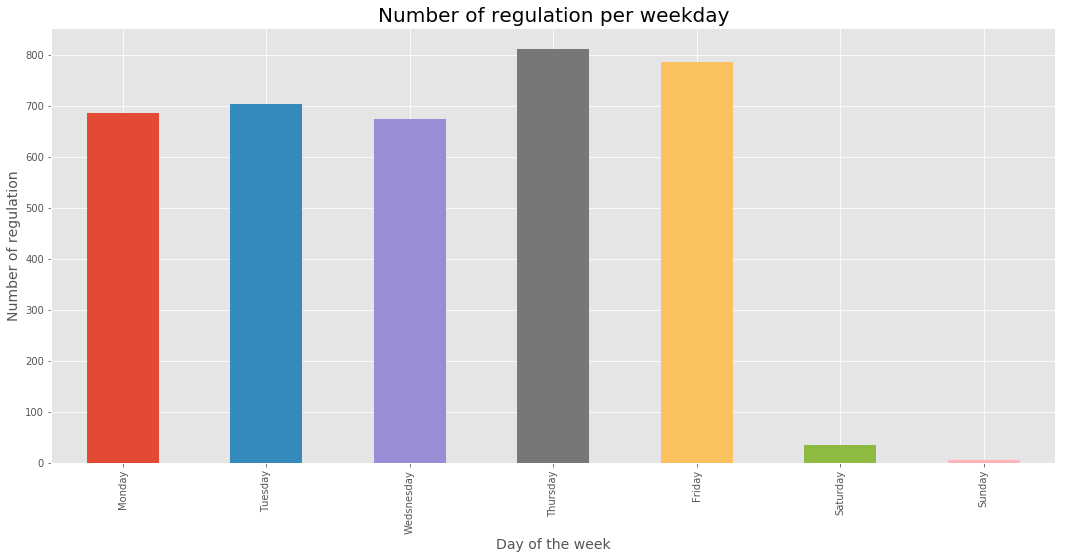

In [31]:
# Histograma de número de regulaciones por día de la semana 

by_weekday.plot.bar()
plt.title("Number of regulation per weekday", fontdict={'fontsize': 20})
plt.ylabel("Number of regulation", fontdict={'fontsize': 14})
plt.xlabel("Day of the week", fontdict={'fontsize': 14});
plt.savefig('regulation_weekday.png')

In [32]:
# Contar por mes

by_month = normas['Month'].value_counts().sort_index()
by_month

1     314
2     426
3     346
4     310
5     302
6     246
7     258
8     310
9     228
10    245
11    311
12    410
Name: Month, dtype: int64

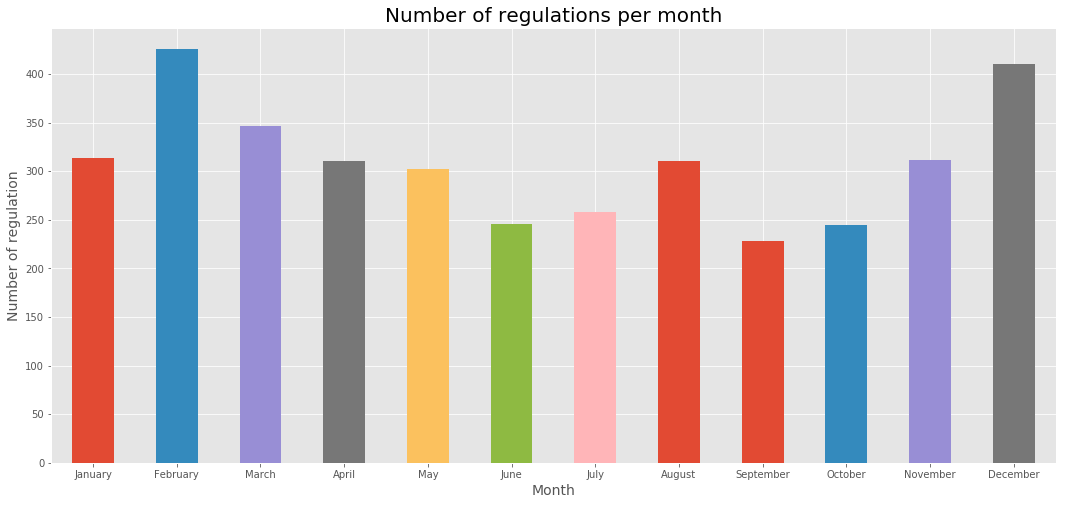

In [33]:
by_month.plot.bar()
plt.title("Number of regulations per month", fontdict={'fontsize': 20})
plt.ylabel("Number of regulation", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.xticks(range(12), labels, rotation='horizontal');
plt.savefig('regulation_month.png')

In [34]:
# Contar por año

by_year = normas['Year'].value_counts().sort_index()
by_year

2016    1034
2017    1109
2018    1189
2019     374
Name: Year, dtype: int64

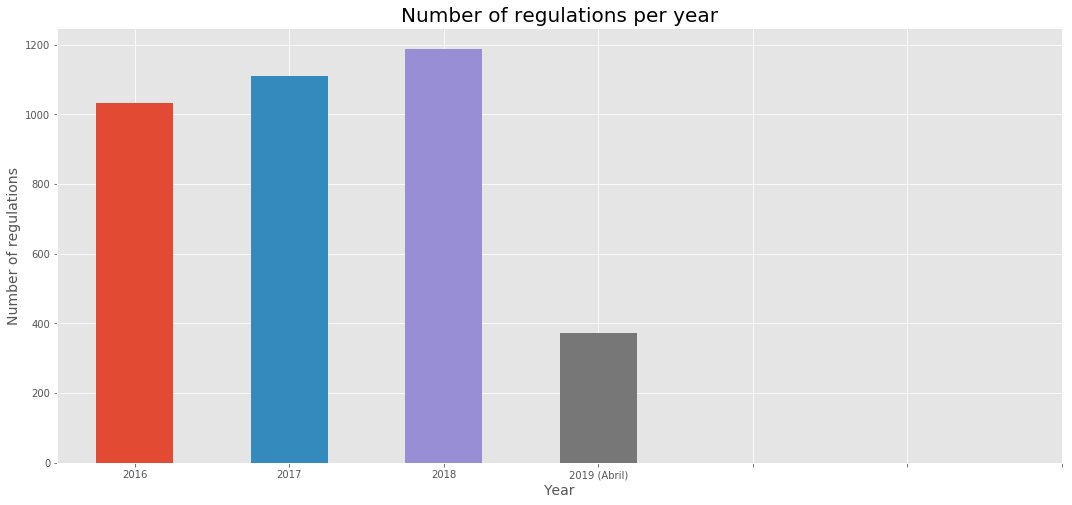

In [35]:
by_year.plot.bar()
plt.title("Number of regulations per year", fontdict={'fontsize': 20})
plt.ylabel("Number of regulations", fontdict={'fontsize': 14})
plt.xlabel("Year", fontdict={'fontsize': 14})
labels = ['2016','2017','2018','2019 (Abril)']
plt.xticks(range(7), labels, rotation='horizontal');
plt.savefig('regulations_year.png')

In [36]:
# Group por mes

by_year_month = pd.groupby(normas, by=[normas['Date'].dt.year, normas['Date'].dt.month])

C:\Users\MARIO MONSALVE\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.groupby() is deprecated and will be removed; Please use the Series.groupby() or DataFrame.groupby() methods
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
month_labels = ['2016-1','2016-2','2016-3','2016-4','2016-5','2016-6','2016-7','2016-8','2016-9','2016-10',\
                '2016-11','2016-12',\
                '2017-1','2017-2','2017-3','2017-4','2017-5','2017-6','2017-7','2017-8','2017-9','2017-10',\
                '2017-11','2017-12',\
                '2018-1','2018-2','2018-3','2018-4','2018-5','2018-6','2018-7','2018-8','2018-9','2018-10',\
                '2018-11','2018-12',\
                '2019-1','2019-2','2019-3','2019-4']

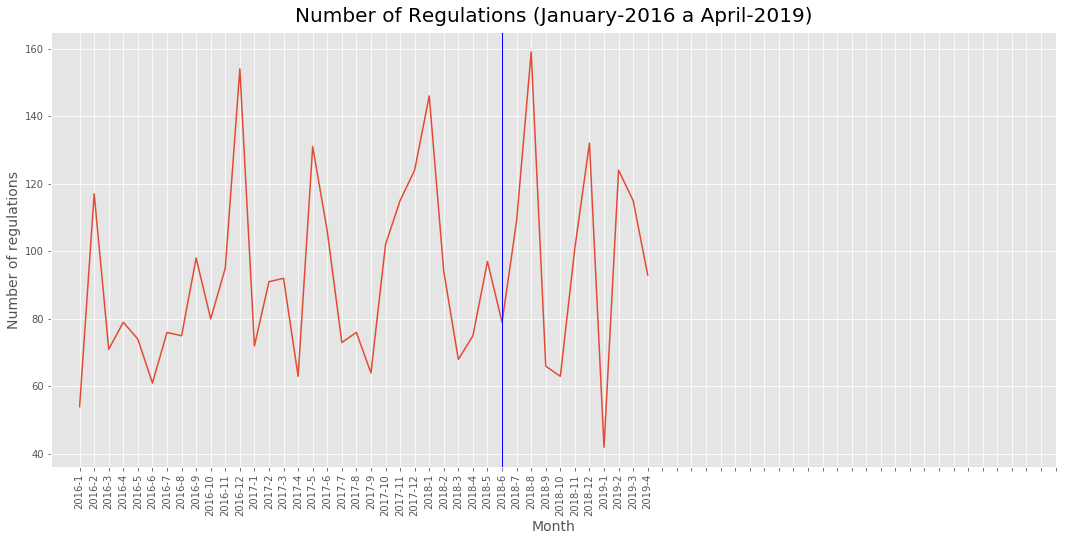

In [38]:
by_month = by_year_month['Month'].agg('count')
by_month.plot()
plt.title("Number of Regulations (January-2016 a April-2019)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of regulations", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = month_labels
plt.xticks(range(68), labels, rotation='vertical')
plt.axvline(x=29, linewidth=1, color='b');
plt.savefig('regulations_line.png')